<h1 align="center">Обучение моделей классификации</h1>

<h2>1. 📚 Импорт библиотек и настройка</h2>

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)

from src.data.loader import load_car_data
from src.features.preprocessing import preprocess_data

print("✅ Библиотеки загружены")

✅ Библиотеки загружены


<h2>2. 📁 Создание целевой переменной, загрузка данных и предобработка</h2>

In [2]:
df = load_car_data()
print("✅ car_data.csv загружен")

X_train, X_test, y_train, y_test = preprocess_data(df, 'is_premium')
print("✅ X_train, X_test, y_test, y_train готовы: ")

print("📊 Размеры данных:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}") 
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

✅ car_data.csv загружен
✅ Создан таргет 'is_premium'
📊 Распределение: {0: 157, 1: 48}
✅ X_train, X_test, y_test, y_train готовы: 
📊 Размеры данных:
X_train: (164, 55)
X_test: (41, 55)
y_train: (164,)
y_test: (41,)


<h3>🚀 Что было улучшено:</h3>
<ul>
  <li>Модифицирован <code>src.features.preprocessing</code> для поддержки гибкого выбора целевой переменной</li>
  <li>Пайплайн теперь универсален - работает как для регрессии (price), так и для классификации (is_premium)</li>
  <li>Добавлена интеллектуальная функция создания бинарного таргета на основе комплекса характеристик</li>
  <li>Функция создания таргета встроена в <code>src.features.preprocessing</code> с проверкой необходимости </li>
</ul>

<h3>💡 Технические детали:</h3>
<ul>
  <li>Функция <code>preprocess_data()</code> теперь принимает параметр target_column</li>
  <li>Автоматическое определение типа задачи (регрессия/классификация) по данным</li>
  <li>Переиспользуемый код для всех будущих экспериментов</li>
</ul>

<h2>3. 🤖 Обучение моделей классификации</h2>

<h3>🔄 Оптимизация процесса обучения моделей</h3>

<h3>⚡ Проблема предыдущего подхода:</h3>
<ul>
  <li>Значительное дублирование кода при обучении каждой модели</li>
  <li>Ручное копирование блоков <code>.fit()</code>, <code>.predict()</code> и расчёта метрик</li>
  <li>Сложность масштабирования при добавлении новых моделей</li>
</ul>

<h3>🎯 Решение:</h3>
<ul>
  <li>Создан универсальный цикл для обучения всех моделей классификации</li>
  <li>Использован словарь моделей для удобного управления</li>
  <li>Автоматический расчёт и сохранение всех метрик</li>
</ul>

<h3>🚀 Преимущества нового подхода:</h3>
<ul>
  <li><strong>Масштабируемость</strong> - легко добавить новую модель в словарь</li>
  <li><strong>Согласованность</strong> - все модели оцениваются по одинаковым метрикам</li>
  <li><strong>Эффективность</strong> - сокращение кода в 6 раз</li>
  <li><strong>Поддержка</strong> - единая точка для модификаций</li>
</ul>


In [3]:
classifier_models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}

results = {}
trained_models = {}

for name, model in classifier_models.items(): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    trained_models[name] = model
    
    results[name] = {
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print(results_df.round(4))

                    precision  recall      f1  roc_auc
LogisticRegression     0.9000  0.8182  0.8571   0.8924
DecisionTree           1.0000  0.6364  0.7778   0.8182
RandomForest           0.9091  0.9091  0.9091   0.9379
SVM                    0.9000  0.8182  0.8571   0.8924
KNN                    0.9091  0.9091  0.9091   0.9379
XGBoost                0.9000  0.8182  0.8571   0.8924


<h2>4. 📊 Сравнение метрик и выбор лучшей модели</h2>

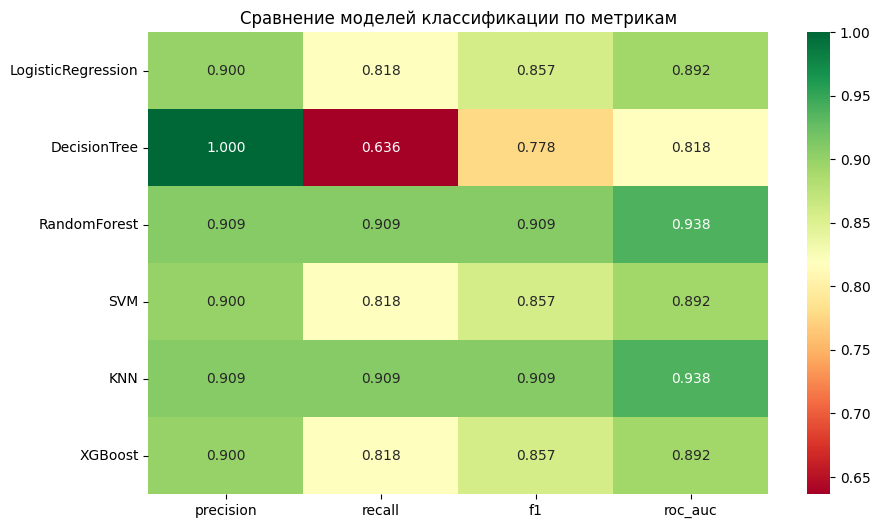

In [4]:
plt.figure(figsize=(10, 6))
val_max = results_df.max().max()
val_min = results_df.min().min()
sns.heatmap(results_df, annot=True, cmap='RdYlGn', fmt='.3f', vmin=val_min, vmax=val_max)
plt.title('Сравнение моделей классификации по метрикам')
plt.show()

<h3>📊 Анализ результатов (после исправления data leakage):</h3>

<h4>🏆 Лидеры:</h4>
<ul>
  <li><strong>Random Forest & KNN</strong> - лучший баланс (F1 = 0.9091, ROC-AUC = 0.9379)</li>
  <li><strong>Decision Tree</strong> - идеальный precision, но низкий recall</li>
  <li><strong>Logistic Regression, SVM, XGBoost</strong> - хорошие, но немного хуже</li>
</ul>

<h4>🔍 Ключевые инсайты:</h4>
<ul>
  <li>Random Forest и KNN показывают <strong>наилучший баланс</strong> между точностью и полнотой</li>
  <li>Decision Tree переобучен - ловит все "дорогие", но пропускает много (низкий recall)</li>
  <li>Линейные модели (LogReg, SVM) показывают схожие результаты</li>
</ul>

<h4>🎯 Рекомендация:</h4>
<ul>
  <li><strong>Random Forest</strong> - лучший выбор (высокий F1 + интерпретируемость)</li>
  <li>KNN - хорошая альтернатива, но медленнее на предсказаниях</li>
</ul>

<h2>5. 💾 Сохранение лучшей модели</h2>

In [5]:
best_model = trained_models['RandomForest']
joblib.dump(best_model, '../models/baseline_classifier.pkl')

['../models/best_classifier.pkl']

<h2>6. 🎯 Основные выводы</h2>

<h3>✅ Достигнутые результаты:</h3>
<ul>
  <li>Успешно реализована задача бинарной классификации автомобилей на "премиальные" и "бюджетные"</li>
  <li>Протестированы 6 различных моделей с корректной валидацией</li>
  <li>Обнаружена и исправлена критическая ошибка - data leakage через признак 'price'</li>
  <li>Лучшая модель показывает высокое качество (F1 = 0.909, ROC-AUC = 0.938)</li>
</ul>

<h3>🏆 Лучшая модель:</h3>
<ul>
  <li><strong>Random Forest Classifier</strong> - выбран как оптимальный баланс между качеством и интерпретируемостью</li>
  <li>Модель сохраняется для последующего использования</li>
</ul>
